In [1]:
import chemprop
import pandas as pd
import numpy as np
from utils import utils

In [83]:
original = pd.read_csv(r'./data/train_dm300_full.csv')

In [41]:
solvents = ["MeOH", "EtOH", "IPA", "Tol", "Hept", "Acet", "MeCN", "MTBE", "MeTHF", "DMF", "EtOAc"]
solvent_names = {"Methanol":"Methanol", 
                "Ethanol":"Ethanol", 
                "2-Propanol":"2-Propanol", 
                "Toluene":"Toluene", 
                "Heptane":"Heptane", 
                "Acetone":"Acetone", 
                "Acetonitrile":"Acetonitrile", 
                "Methyl tert butyl ether":"Methyl\ntert-butyl ether", 
                "2-Methly tetrahydrofurane":"2-Methyl\ntetrahydrofurane",
                "Dimethyl formamide":"Dimethyl\nformamide", 
                "Etyl acetate":"Ethyl\nacetate" }

solvent_dict = {}
for solvent, name in zip(solvents, solvent_names.keys()):
    solvent_dict[solvent] = original[original['solvent_name']==name]

In [42]:
original.to_csv(r'./data/_full.csv')

In [71]:
solvent_dict['DMF'].to_csv(r'./data/_dmf.csv')
len(solvent_dict['DMF'])

123

In [96]:
#original = pd.read_csv(r'C:\Users\ignaczg\Dropbox\Gergo Ignacz\Projects\AI\pims\data\perm_data_noned.csv')

for i in range(1):
    print(f'{i}th cycle')
    arguments = [
        '--data_path', './data/FINAL_LIST.csv',
        '--dataset_type', 'regression',
        '--save_dir', './data/train_results/removal/',
        '--metric', 'rmse',
        '--quiet',
        '--split_sizes', '0.795', '0.2', '0.005',
        '--target_columns', 'dm300',
        '--smiles_column', 'full_smiles',
        '--epochs', '50'
        ]


    args = chemprop.args.TrainArgs().parse_args(arguments)
    mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

    arguments = [
        '--test_path',  './data/FINAL_LIST.csv',
        '--preds_path', './data/predictions/_temp_FINAL_LIST.csv',
        '--checkpoint_dir', './data/train_results/removal/',
        '--smiles_column', 'full_smiles'
        ]

    args = chemprop.args.PredictArgs().parse_args(arguments)
    preds = chemprop.train.make_predictions(args=args)

    original = pd.read_csv(r'./data/FINAL_LIST.csv')
    print('#############################')
    print('ORIGINAL',len(original))
    temp = pd.read_csv(r'./data/predictions/_temp_FINAL_LIST.csv')
    print('#############################')
    print('TEMP',len(original))

    temp.rename(columns={'dm300':'dm300_pred'}, inplace=True)
    temp['dm300_pred'].mask(temp['dm300_pred'] > 1., 1., inplace=True)
    # original['dm300_err'] = np.divide(np.subtract(temp['dm300_pred'], original['dm300']), original['dm300'])
    original['dm300_err'] = np.abs(np.subtract(temp['dm300_pred'], original['dm300']))

    # original['global_err'] = np.abs(np.divide(np.add(original['dm300_err'], np.add(original['d'], np.add(original['co2_err'], np.add(original['o2_err'], np.add(original['n2_err'], original['ch4_err']))))), 6))
    original['dm300_measured'] = temp['dm300_pred']    
    original = original.sort_values('dm300_err', ascending=False)
    #original = original[5:]

    original.to_csv(r'./data/_FINAL_LIST.csv', sep=',')


0th cycle


1032it [00:00, 87344.31it/s]
100%|████████████████████████████████████| 1032/1032 [00:00<00:00, 70343.58it/s]
Fold 0
100%|███████████████████████████████████████████| 17/17 [00:00<00:00, 29.29it/s]
                                                                                
 94%|████████████████████████████████████████▍  | 16/17 [00:00<00:00, 33.53it/s]
                                                                                
 94%|████████████████████████████████████████▍  | 16/17 [00:00<00:00, 32.95it/s]
                                                                                
 94%|████████████████████████████████████████▍  | 16/17 [00:00<00:00, 32.73it/s]
                                                                                
 94%|████████████████████████████████████████▍  | 16/17 [00:00<00:00, 33.07it/s]
                                                                                
 94%|████████████████████████████████████████▍  | 16/17 [00:00<00:00, 33.

 88%|█████████████████████████████████████▉     | 15/17 [00:00<00:00, 26.16it/s]
                                                                                
 94%|████████████████████████████████████████▍  | 16/17 [00:00<00:00, 31.30it/s]
                                                                                
 94%|████████████████████████████████████████▍  | 16/17 [00:00<00:00, 30.90it/s]
                                                                                
 88%|█████████████████████████████████████▉     | 15/17 [00:00<00:00, 28.28it/s]
                                                                                
 88%|█████████████████████████████████████▉     | 15/17 [00:00<00:00, 26.09it/s]
                                                                                
 88%|█████████████████████████████████████▉     | 15/17 [00:00<00:00, 27.13it/s]
                                                                                
 94%|███████████████████████

 88%|█████████████████████████████████████▉     | 15/17 [00:00<00:00, 26.60it/s]
                                                                                
 88%|█████████████████████████████████████▉     | 15/17 [00:00<00:00, 27.70it/s]
                                                                                
 88%|█████████████████████████████████████▉     | 15/17 [00:00<00:00, 28.34it/s]
                                                                                
 88%|█████████████████████████████████████▉     | 15/17 [00:00<00:00, 26.35it/s]
                                                                                
 88%|█████████████████████████████████████▉     | 15/17 [00:00<00:00, 27.58it/s]
                                                                                
 88%|█████████████████████████████████████▉     | 15/17 [00:00<00:00, 27.91it/s]
                                                                                
 88%|███████████████████████

 94%|████████████████████████████████████████▍  | 16/17 [00:00<00:00, 28.50it/s]
                                                                                
 88%|█████████████████████████████████████▉     | 15/17 [00:00<00:00, 28.18it/s]
                                                                                
 82%|███████████████████████████████████▍       | 14/17 [00:00<00:00, 28.79it/s]
                                                                                
 88%|█████████████████████████████████████▉     | 15/17 [00:00<00:00, 28.37it/s]
                                                                                
 94%|████████████████████████████████████████▍  | 16/17 [00:00<00:00, 30.07it/s]
                                                                                
 88%|█████████████████████████████████████▉     | 15/17 [00:00<00:00, 30.11it/s]
                                                                                
 94%|███████████████████████

                                                                                
100%|███████████████████████████████████████████| 17/17 [00:00<00:00, 30.85it/s]
                                                                                
 82%|███████████████████████████████████▍       | 14/17 [00:00<00:00, 29.42it/s]
                                                                                
 94%|████████████████████████████████████████▍  | 16/17 [00:00<00:00, 30.48it/s]
                                                                                
 88%|█████████████████████████████████████▉     | 15/17 [00:00<00:00, 27.67it/s]
                                                                                
 88%|█████████████████████████████████████▉     | 15/17 [00:00<00:00, 27.65it/s]
                                                                                
100%|███████████████████████████████████████████| 50/50 [00:35<00:00,  1.42it/s]
Model 0 best validation rmse

Loading training args
Setting molecule featurization parameters to default.
Loading data


1032it [00:00, 158374.07it/s]
100%|███████████████████████████████████| 1032/1032 [00:00<00:00, 303734.60it/s]


Validating SMILES
Test size = 1,032
Predicting with an ensemble of 1 models



  0%|                                                     | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.22it/s]


Saving predictions to ./data/predictions/_temp_FINAL_LIST.csv
Elapsed time = 0:00:01
#############################
ORIGINAL 1032
#############################
TEMP 1032


In [84]:
meoh = pd.read_csv(r'./data/_meoh.csv')
mecn = pd.read_csv(r'./data/_mecn.csv')
dmf = pd.read_csv(r'./data/_dmf.csv')

In [85]:
total = pd.concat([mecn, dmf, meoh])

In [86]:
temp = original

In [87]:
temp = temp[temp['solvent_name']!='Acetonitrile']
temp = temp[temp['solvent_name']!='Methanol']
temp = temp[temp['solvent_name']!='Dimethyl formamide']

In [88]:
full_list = pd.concat([temp, total])

In [89]:
len(full_list)

1032

In [90]:
full_list.to_csv(r'./data/FINAL_LIST.csv')

In [97]:
meoh = pd.read_csv(r'./data/_FINAL_LIST.csv')
len(meoh)

1032

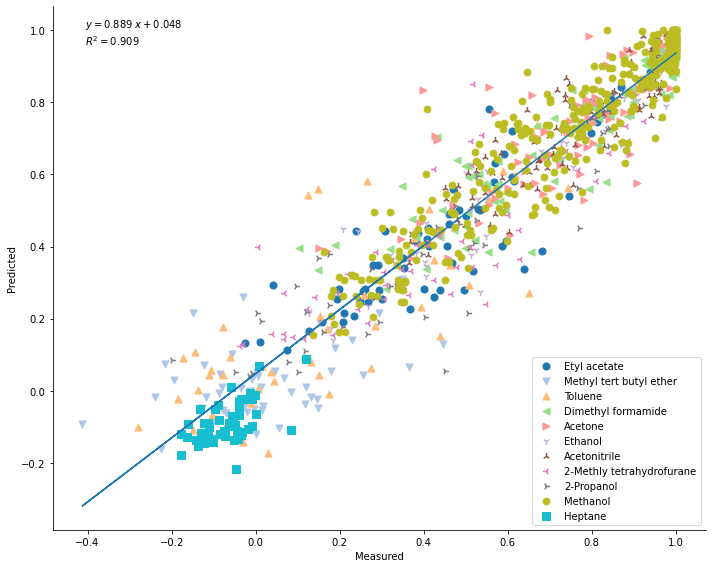

In [98]:
utils.rejection_diagram(data=meoh, x='dm300', y='dm300_measured', x_axis='Measured', y_axis="Predicted", group='solvent_name')